<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [299]:
import pandas  as pd
import numpy as np
from  os import path
import seaborn as sns
import matplotlib.pyplot as plt


## Loaded Olympic data

In [316]:
oly_location = path.join('res', 'olympic', 'results.csv')
oly_data = pd.read_csv(oly_location, delimiter= ',', encoding='UTF-8', error_bad_lines=False)
oly_train = pd.DataFrame(oly_data)
oly_train

C:\Users\peter\AppData\Local\Temp\ipykernel_10740\884100174.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  oly_data = pd.read_csv(oly_location, delimiter= ',', encoding='UTF-8', error_bad_lines=False)
Skipping line 156: expected 8 fields, saw 9
Skipping line 157: expected 8 fields, saw 9
Skipping line 158: expected 8 fields, saw 9
Skipping line 317: expected 8 fields, saw 9
Skipping line 318: expected 8 fields, saw 9
Skipping line 319: expected 8 fields, saw 9
Skipping line 1658: expected 8 fields, saw 9
Skipping line 1659: expected 8 fields, saw 9
Skipping line 1660: expected 8 fields, saw 9
Skipping line 1784: expected 8 fields, saw 9
Skipping line 1785: expected 8 fields, saw 9
Skipping line 1786: expected 8 fields, saw 9



,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77
...,...,...,...,...,...,...,...,...
2377,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25
2378,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14
2379,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33
2380,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98


In [301]:
ath_location = path.join('res', 'athletes', 'athlete_events.csv')
data = pd.read_csv(ath_location, encoding='UTF-8')
data_test = pd.DataFrame(data)
data_test.head()
data_test.sample(15)
data.sort_values('Year').head()

data.sort_values('Year').tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142355,71419,Luis Fernando Lpez Erazo,M,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
47729,24610,Enrico D'Aniello,M,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,NaN
47728,24609,Sabrina D'Angelo,F,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
47746,24621,Andrea Mitchell D'Arrigo,M,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,NaN
236646,118650,Blair Tarrant,M,26.0,185.0,83.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,NaN


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

<Axes: xlabel='Year', ylabel='Sport'>

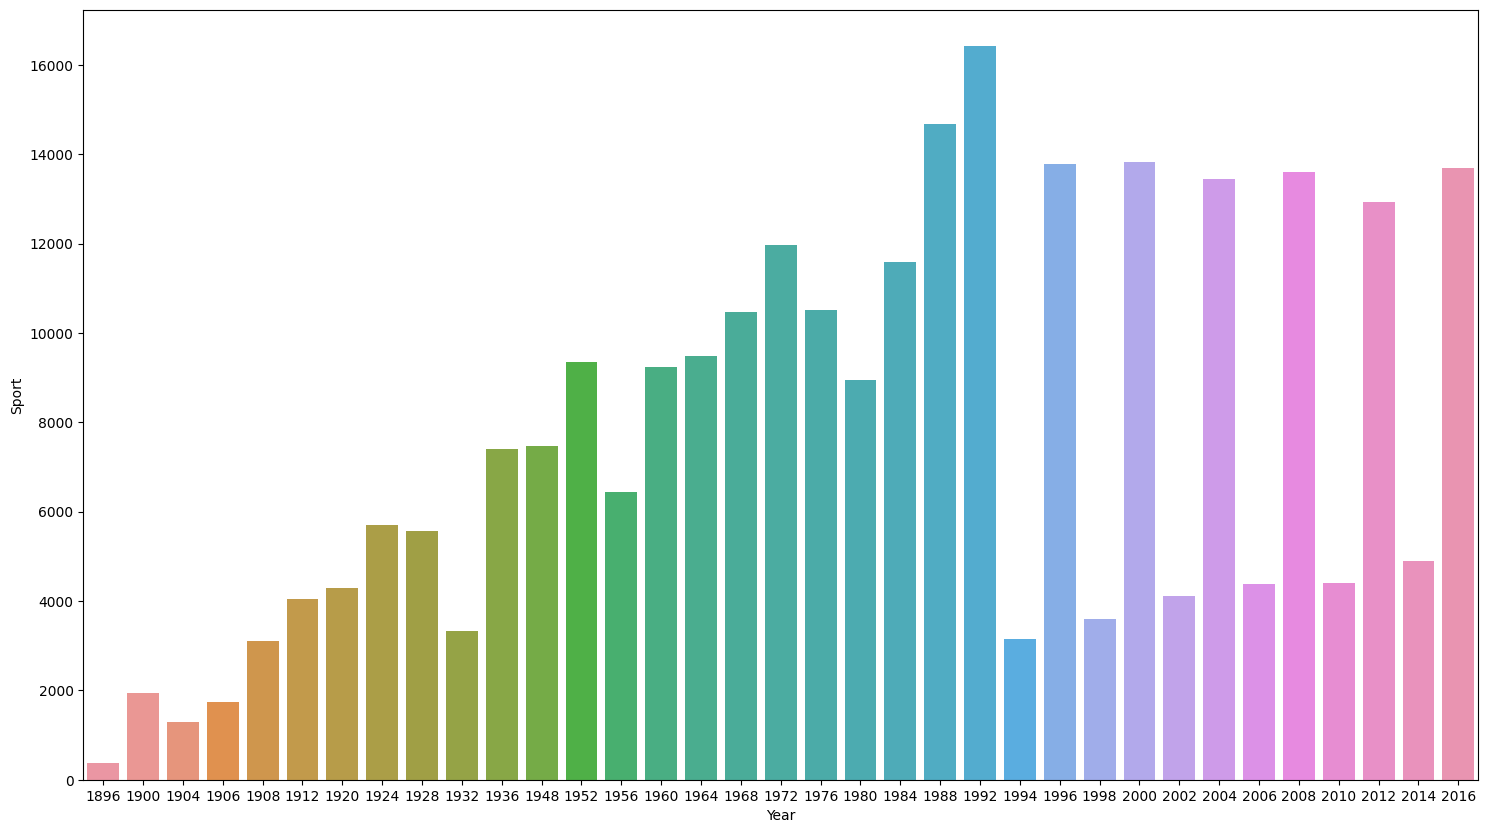

In [302]:
from matplotlib import rcParams

data = data_test['Sport'].groupby(data_test['Year']).size()
data = data.reset_index()
rcParams['figure.figsize'] = 18, 10
sns.barplot(y = data['Sport'], x = data['Year'])

Text(0.5, 1.0, 'Evolución de la participación femenina en las olimpiadas')

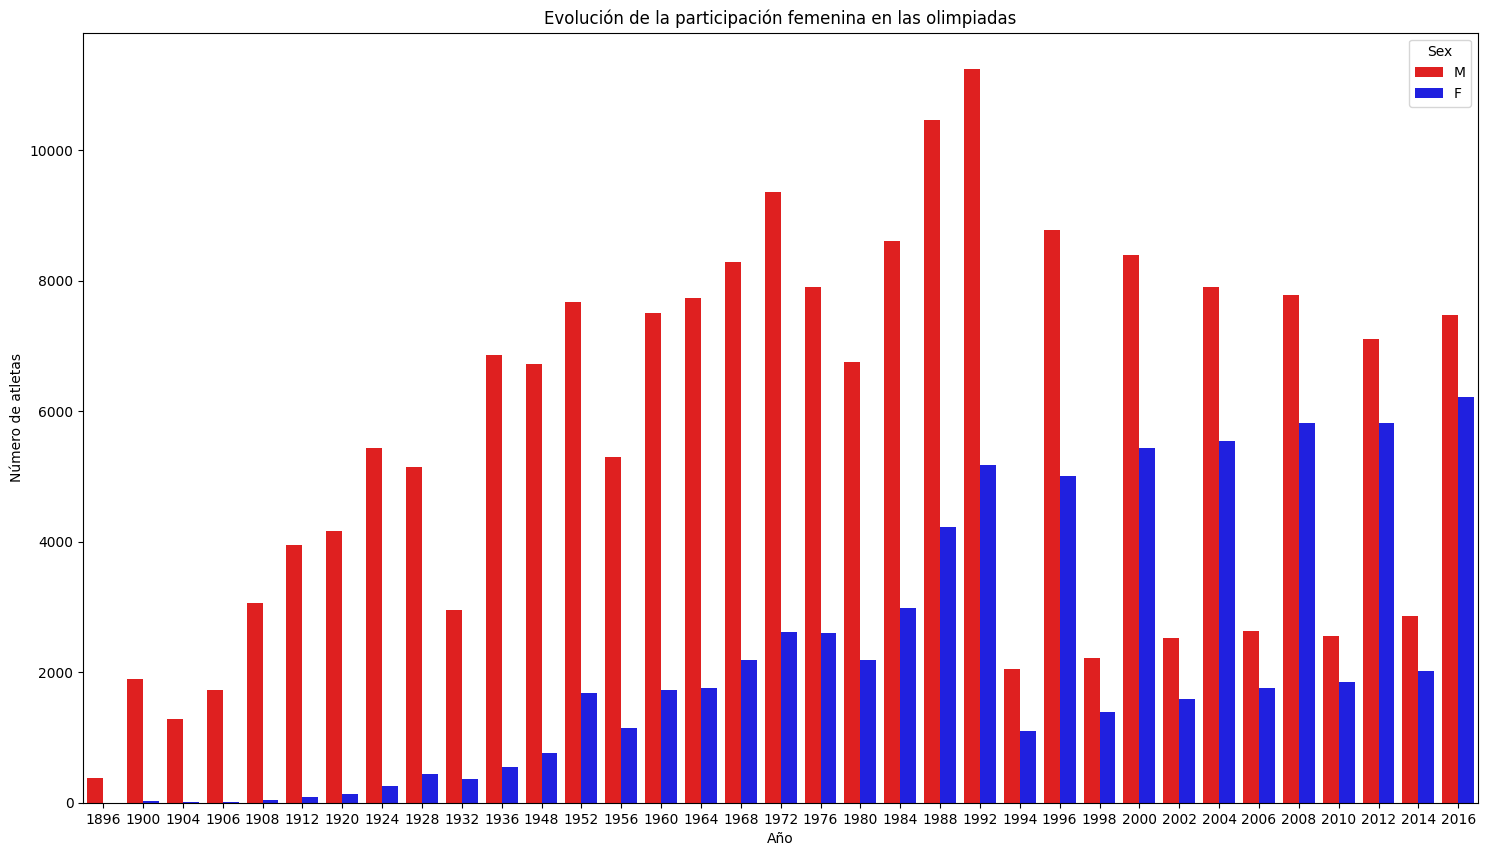

In [320]:
data1 = data_test.groupby([data_test['Year'],'Sex']).size().unstack()
fig, ax = plt.subplots(figsize=(18, 10))
data_gender = data_test[data_test.Sex.isin(['M', 'F'])]
sns.countplot(x='Year', hue='Sex', data=data_gender, ax=ax, palette=['red','blue'])

ax.set_xlabel('Año')
ax.set_ylabel('Número de atletas')
ax.set_title('Evolución de la participación femenina en las olimpiadas')

In [318]:
data_gender = data_test[data_test.Sex.isin(['M', 'F'])]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)